In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [14]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (10, 5)

In [15]:
service_requests = (pd.read_csv("311-service-requests.csv"))

/home/kate/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [16]:
service_requests

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111065,26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160,-73.767353,"(40.656160351546845, -73.76735262738222)"
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295,-73.976952,"(40.740295354643706, -73.97695165980414)"
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640182,-73.955306,"(40.64018174662485, -73.95530566958138)"


In [17]:
service_requests.rename(columns={"Location Type": "location_type"},
                        inplace=True)
service_requests.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,location_type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


In [34]:
for_print=service_requests["location_type"].value_counts()
for_print

RESIDENTIAL BUILDING             39067
Street/Sidewalk                  12036
Street                           11569
Sidewalk                          5220
Club/Bar/Restaurant               1865
                                 ...  
Steam Room                           1
Pier                                 1
Street Fair Vendor                   1
1-3 Family Mixed Use Building        1
Soup Kitchen                         1
Name: location_type, Length: 90, dtype: int64

<AxesSubplot:>

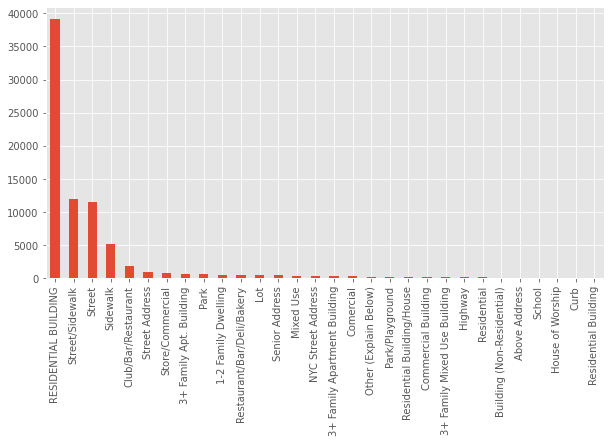

In [37]:
for_print[:30].plot(kind="bar")

In [18]:
locatoin_nan=pd.isnull(service_requests.location_type)
locatoin_nan

0         False
1         False
2         False
3         False
4         False
          ...  
111064    False
111065    False
111066    False
111067    False
111068    False
Name: location_type, Length: 111069, dtype: bool

In [19]:
filtered_not_null = service_requests[service_requests['location_type'].notnull()]
filtered_nullable = service_requests[service_requests['location_type'].isnull()]
len(filtered_not_null)

79022

In [20]:
filtered_nullable

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,location_type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
18,26590389,10/31/2013 12:51:00 AM,NaN,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,NaN,226 42 ST E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,26590509,10/31/2013 12:33:00 AM,NaN,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,NaN,38 ST E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,26589201,10/31/2013 12:32:00 AM,NaN,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,10309,295 BAYVIEW AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.517378,-74.203435,"(40.517377871705676, -74.20343466779575)"
32,26591378,10/31/2013 12:30:31 AM,NaN,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,NaN,10036,645 10 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.761929,-73.993809,"(40.761928847500016, -73.99380918401052)"
36,26590262,10/31/2013 12:23:00 AM,NaN,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11235,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.581744,-73.953836,"(40.5817444882428, -73.95383634845487)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111052,26437035,10/04/2013 12:08:00 AM,10/04/2013 12:13:00 AM,DEP,Department of Environmental Protection,Water System,Dirty Water (WE),NaN,10022,325 EAST 54 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.757069,-73.965933,"(40.75706852462872, -73.96593314322774)"
111057,26437034,10/04/2013 12:06:00 AM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Jack Hammering (NC2),NaN,10036,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.760116,-73.984836,"(40.76011648520396, -73.98483562074706)"
111060,26434084,10/04/2013 12:04:00 AM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10036,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.760405,-73.987474,"(40.76040500039782, -73.98747426235285)"
111062,26439710,10/04/2013 12:03:00 AM,10/04/2013 12:03:00 AM,DEP,Department of Environmental Protection,Water System,Dirty Water (WE),NaN,10022,325 EAST 54 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.757069,-73.965933,"(40.75706852462872, -73.96593314322774)"


In [21]:
len(filtered_nullable)

32047

In [29]:
filtered_for_test=filtered_nullable["Descriptor"].value_counts()
filtered_for_test

Street Light Out                                               5396
Property Tax Exemption Application for Owners - English        4683
Controller                                                     1833
Pothole                                                        1666
Noise: Construction Before/After Hours (NM1)                   1625
                                                               ... 
Bus Lane Camera Violation Appeal Application                      1
DRIE - SCRIE-DRIE Transfer Application                            1
Service line termination *FOR DEP INTERNAL USE ONLY* (WSLT)       1
Illegal Activity by Phone                                         1
Commercial Cyclist - Rider Identification                         1
Name: Descriptor, Length: 438, dtype: int64

<AxesSubplot:>

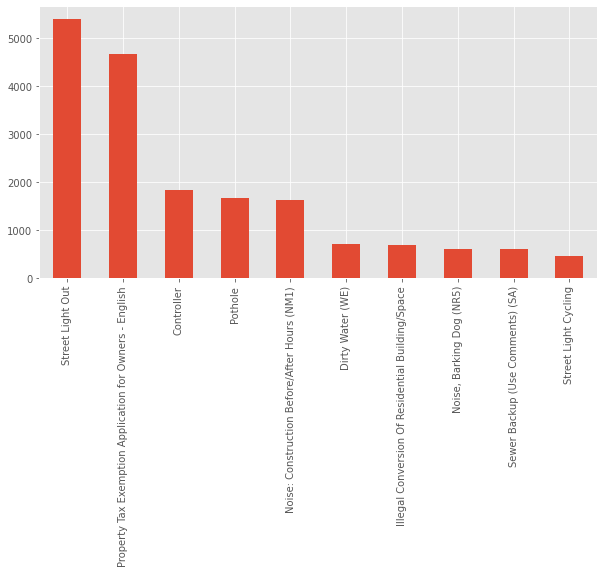

In [30]:
filtered_for_test[:10].plot(kind="bar")

In [23]:
service_requests[["location_type", "Agency"]][:6]

,location_type,Agency
0,Street/Sidewalk,NYPD
1,Street/Sidewalk,NYPD
2,Club/Bar/Restaurant,NYPD
3,Street/Sidewalk,NYPD
4,Vacant Lot,DOHMH
5,Club/Bar/Restaurant,NYPD


In [24]:
service_requests["Agency Name"].value_counts()

Department of Housing Preservation and Development                 39067
Department of Transportation                                       17706
New York City Police Department                                    15295
Department of Environmental Protection                              8896
Department of Finance                                               5795
                                                                   ...  
School - PS 46 Arthur Tappan                                           1
School - PS 138                                                        1
School - Grace Dodge Career and Technical Education High School        1
School - PS 373 - Brooklyn Transition Center                           1
School - PS 30 Westerleigh                                             1
Name: Agency Name, Length: 135, dtype: int64

In [25]:
service_requests["location_type"].value_counts()

RESIDENTIAL BUILDING             39067
Street/Sidewalk                  12036
Street                           11569
Sidewalk                          5220
Club/Bar/Restaurant               1865
                                 ...  
Steam Room                           1
Pier                                 1
Street Fair Vendor                   1
1-3 Family Mixed Use Building        1
Soup Kitchen                         1
Name: location_type, Length: 90, dtype: int64

In [26]:
service_requests_type = service_requests["location_type"].value_counts()
service_requests_type[:10]

RESIDENTIAL BUILDING       39067
Street/Sidewalk            12036
Street                     11569
Sidewalk                    5220
Club/Bar/Restaurant         1865
Street Address              1022
Store/Commercial             834
3+ Family Apt. Building      689
Park                         653
1-2 Family Dwelling          572
Name: location_type, dtype: int64

<AxesSubplot:>

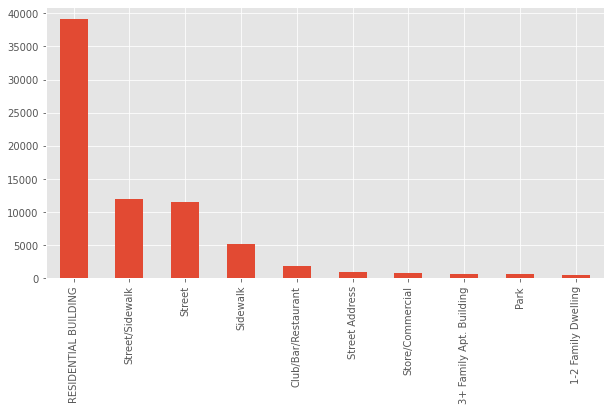

In [27]:
service_requests_type[:10].plot(kind="bar")

In [28]:
len(service_requests[service_requests["location_type"] == "Street"])

11569